dft 결과 해석을 위해 pd/ controls의 걸음수를 세어봄.

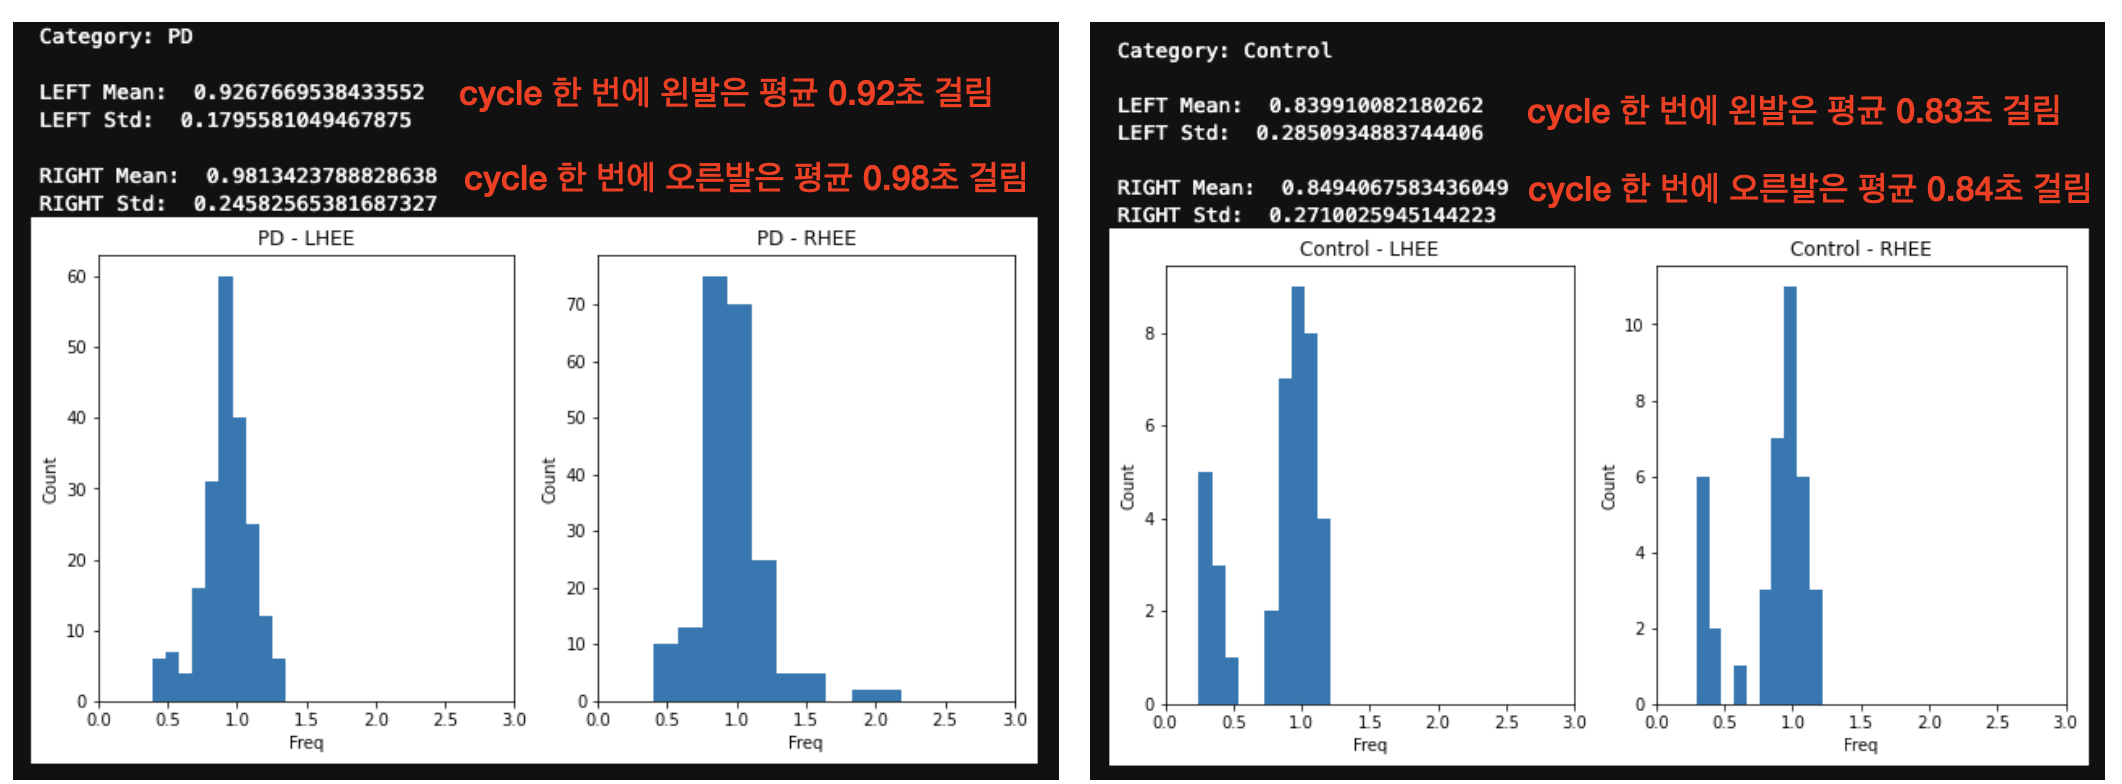

In [50]:
import os
import glob
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
SAVEPATH = "/Users/sujinlee/Desktop/nims/pd/dataset_LHEE_RHEE_Z_PHASE_APPLIED_WINDOW_"
CONTROL_R = os.path.join(SAVEPATH, "Controls")
PD_R = os.path.join(SAVEPATH, "PD")

if os.path.exists(SAVEPATH) == False: os.mkdir(SAVEPATH)
if os.path.exists(os.path.join(SAVEPATH, "Controls")) == False: os.mkdir(os.path.join(SAVEPATH, "Controls"))
if os.path.exists(os.path.join(SAVEPATH, "PD")) == False: os.mkdir(os.path.join(SAVEPATH, "PD"))

In [18]:
c_cnts = []
for f in os.listdir(CONTROL_R):
    try:
        starts = np.load(os.path.join(os.path.join(SAVEPATH, os.path.join("Controls_window_fig", "starts")), f"{f.split('/')[-1].replace('.csv','')}_starts.npy"))

        cnt = 0
        for elem in starts:
    #         print(elem[1])
            if elem[1] == 1: cnt+=1

        c_cnts.append(cnt)
    except: pass

In [28]:
len(c_cnts), np.mean(c_cnts), np.min(c_cnts), np.max(c_cnts)

(63, 3.238095238095238, 2, 4)

In [24]:
p_cnts = []
for f in os.listdir(PD_R):
    try:
        starts = np.load(os.path.join(os.path.join(SAVEPATH, os.path.join("PD_window_fig", "starts")), f"{f.split('/')[-1].replace('.csv','')}_starts.npy"))

        cnt = 0
        for elem in starts:
    #         print(elem[1])
            if elem[1] == 1: cnt+=1

        p_cnts.append(cnt)
    except: pass

In [30]:
len(p_cnts), np.mean(p_cnts), np.min(p_cnts), np.max(p_cnts)

(207, 3.2946859903381642, 2, 6)

Text(0.5, 1.0, 'Controls step counts')

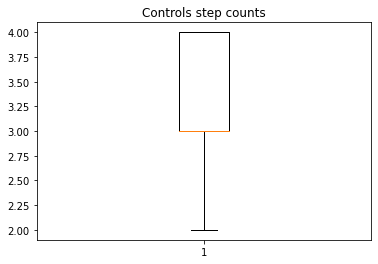

In [59]:
plt.boxplot(c_cnts)
plt.title("Controls step counts")

Text(0.5, 1.0, 'PD step counts')

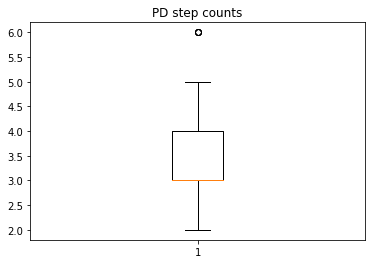

In [60]:
plt.boxplot(p_cnts)
plt.title("PD step counts")

---

In [46]:
c_lens = []
for f in glob.glob(os.path.join(CONTROL_R,"*FW*.csv")):
#     print(f)
    df = pd.read_csv(f)
#     print(len(df))
    c_lens.append(len(df))

In [47]:
np.mean(c_lens), np.min(c_lens), np.max(c_lens)

(388.6507936507937, 247, 982)

In [48]:
p_lens = []
for f in glob.glob(os.path.join(PD_R,"*FW*.csv")):
#     print(f)
    df = pd.read_csv(f)
#     print(len(df))
    p_lens.append(len(df))

In [49]:
np.mean(p_lens), np.min(p_lens), np.max(p_lens)

(364.4347826086956, 199, 1102)

Text(0, 0.5, 'frame length(time)')

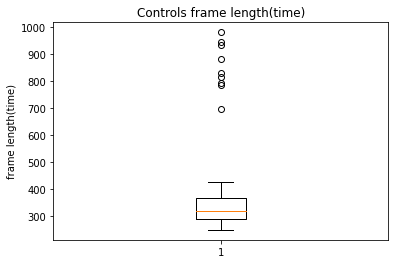

In [65]:
plt.boxplot(c_lens)
plt.title("Controls frame length(time)")
plt.ylabel("frame length(time)")

Text(0, 0.5, 'frame length(time)')

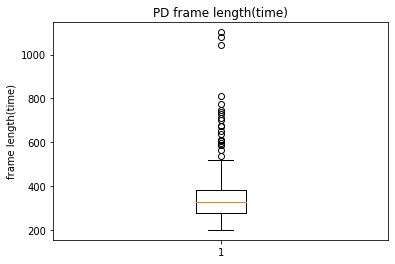

In [66]:
plt.boxplot(p_lens)
plt.title("PD frame length(time)")
plt.ylabel("frame length(time)")